In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading csv files
df2 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten3.csv", delimiter = ",")
df3 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten4.csv", delimiter = ",")
df4 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten5.csv", delimiter = ",")
df5 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten6.csv", delimiter = ",")
df6 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten7.csv", delimiter = ",")
df7 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten8.csv", delimiter = ",")
df8 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten9.csv", delimiter = ",")
df9 = pd.read_table(r"C:\Users\Munish\Desktop\Scraping Eth\ropsten10.csv", delimiter = ",")

In [4]:
#Combining csv files
dfinal = [df2,df3,df4,df5,df6,df7,df8,df9]
result = pd.concat(dfinal)
result.shape

(383, 10)

In [5]:
result.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'txns1', 'txns1-href',
       'transaction_hash', 'status', 'block_confirmations', 'Confirmed_time',
       'timestamp', 'blockno'],
      dtype='object')

In [6]:
type(result.blockno)

pandas.core.series.Series

In [7]:
result["txns1-href"].nunique()

360

In [8]:
    result["time_in_seconds"] = result["timestamp"]

In [9]:
def get_index(ans):
    i = 0;
    while(ans[i]!= " "):
        i+=1;
    return i

def convertStr(ans):
    space = get_index(ans)
    time  = int(ans[:space])
    if(ans[space+1] == "m"):
        time *= 60
    elif (ans[space+1] == "h"):
        time = time*60*60
    return time


In [10]:

arr = []
for i in range(0,result.shape[0]):
    arr.append( convertStr(result['timestamp'].iloc[i]))

In [11]:
 result["time_in_seconds"] = arr

In [12]:
result["time_in_seconds"].nunique()

11

In [13]:
def convertBlcks(ans):
    time  = int(ans[:2])
    return time


arr_new = []
for i in range(0,result.shape[0]):
    arr_new.append( convertStr(result['block_confirmations'].iloc[i]))

In [14]:
result["blockss"] = arr_new

In [15]:
arr_avg = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg.append(7*time/blocks)
result["time_per_7blocks"] = arr_avg




In [16]:
result["time_per_7blocks"].shape

(383,)

In [17]:
result.shape

(383, 13)

In [18]:
result["time_per_7blocks"].describe()


count    383.000000
mean      75.527287
std        7.386639
min       46.666667
25%       70.000000
50%       77.777778
75%       80.769231
max       93.333333
Name: time_per_7blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

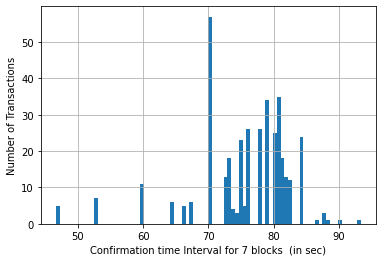

In [19]:
graph7 = result["time_per_7blocks"].hist(bins=80)
graph7.set_xlabel("Confirmation time Interval for 7 blocks  (in sec)")
graph7.set_ylabel("Number of Transactions")

In [20]:
arr_avg12 = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg12.append(12*time/blocks)
result["time_per_12blocks"] = arr_avg12


In [21]:
result["time_per_12blocks"].describe()

count    383.000000
mean     129.475349
std       12.662810
min       80.000000
25%      120.000000
50%      133.333333
75%      138.461538
max      160.000000
Name: time_per_12blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

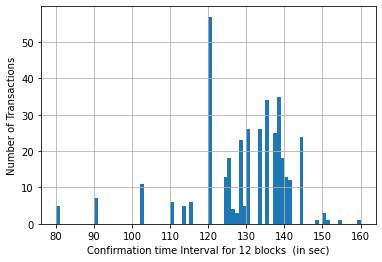

In [22]:
graph12 = result["time_per_12blocks"].hist(bins=80)
graph12.set_xlabel("Confirmation time Interval for 12 blocks  (in sec)")
graph12.set_ylabel("Number of Transactions")